In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input, Concatenate, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# import dataset
df = pd.read_excel('DataSet_v1.xlsx', skiprows=3).drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(667, 16)


,ID,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Final Task,Participation in Class,Final Exam,Linguistic Comprehension,Mathematic,Final average,Target,Output Feature 2
0,1,2022,ISI,M,9,19.0,17.0,12.0,13.0,19,12.0,19,17,13.40,Approved,Complete
1,2,2022,ISI,F,15,20.0,20.0,20.0,20.0,18,14.0,20,19,17.90,Approved,Complete
2,3,2022,ISI,M,6,0.0,0.0,5.0,6.0,14,6.0,11,10,5.05,Disapproved,Complete
3,4,2022,ISI,M,20,20.0,20.0,20.0,20.0,20,18.0,20,19,19.50,Approved,Complete
4,5,2022,ISI,M,6,16.0,15.0,7.0,17.0,18,7.0,16,12,11.60,Disapproved,Complete


##### Initial Analysis

In [4]:
# check for missing values
df.isnull().sum()

ID                          0
Year of Income              0
Career                      0
Gender                      0
Qualified Practice 1        0
Partial Task                2
Midterm Exam                2
Qualified Practice 2        0
Final Task                  2
Participation in Class      0
Final Exam                  0
Linguistic Comprehension    0
Mathematic                  0
Final average               0
Target                      0
Output Feature 2            0
dtype: int64

In [5]:
# check missing percentage
df.isnull().sum()/df.shape[0]*100

ID                          0.00000
Year of Income              0.00000
Career                      0.00000
Gender                      0.00000
Qualified Practice 1        0.00000
Partial Task                0.29985
Midterm Exam                0.29985
Qualified Practice 2        0.00000
Final Task                  0.29985
Participation in Class      0.00000
Final Exam                  0.00000
Linguistic Comprehension    0.00000
Mathematic                  0.00000
Final average               0.00000
Target                      0.00000
Output Feature 2            0.00000
dtype: float64

Since its less than 1 percent, we can drop the rows with missing values.

In [6]:
# drop missing values
df.dropna(inplace=True)

In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
# check data types
df.dtypes

ID                            int64
Year of Income                int64
Career                       object
Gender                       object
Qualified Practice 1          int64
Partial Task                float64
Midterm Exam                float64
Qualified Practice 2        float64
Final Task                  float64
Participation in Class        int64
Final Exam                  float64
Linguistic Comprehension      int64
Mathematic                    int64
Final average               float64
Target                       object
Output Feature 2             object
dtype: object

In [9]:
# convert year to categorical
df['Year of Income'] = df['Year of Income'].astype('object')

In [10]:
# check number of unique values
df.nunique()

ID                          661
Year of Income                3
Career                        3
Gender                        2
Qualified Practice 1         21
Partial Task                  9
Midterm Exam                 21
Qualified Practice 2         24
Final Task                   15
Participation in Class       13
Final Exam                   23
Linguistic Comprehension     20
Mathematic                   19
Final average               177
Target                        2
Output Feature 2              2
dtype: int64

We see ID is a unique identifier for each row. We can drop it as it does not add any value to our analysis. We will also drop Output Feature 2 as we are not going to use it in our analysis.

In [11]:
# drop redundant columns
df.drop(['ID','Final Task','Participation in Class','Final Exam','Linguistic Comprehension','Mathematic', 'Output Feature 2','Final average'], axis=1, inplace=True)

In [12]:
df.head()

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Target
0,2022,ISI,M,9,19.0,17.0,12.0,Approved
1,2022,ISI,F,15,20.0,20.0,20.0,Approved
2,2022,ISI,M,6,0.0,0.0,5.0,Disapproved
3,2022,ISI,M,20,20.0,20.0,20.0,Approved
4,2022,ISI,M,6,16.0,15.0,7.0,Disapproved


##### Univariate Analysis of Numerical Features

Feature Name: Qualified Practice 1
Mean: 12.198184568835098
Median: 13.0
Standard Deviation: 6.192497638453004
Minimum: 0
Maximum: 20
Skewness: -0.28684268074828206
Kurtosis: -1.067693743032935


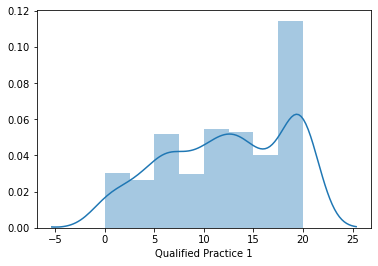

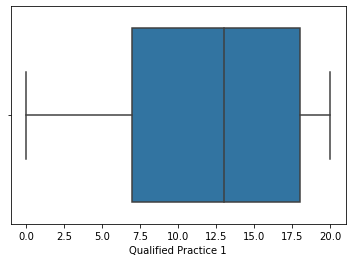

----------------------------------------
Feature Name: Partial Task
Mean: 17.89409984871407
Median: 18.0
Standard Deviation: 2.1357657733234685
Minimum: 0.0
Maximum: 20.0
Skewness: -3.7954802882639673
Kurtosis: 28.171000611134698


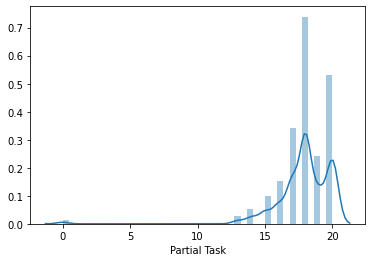

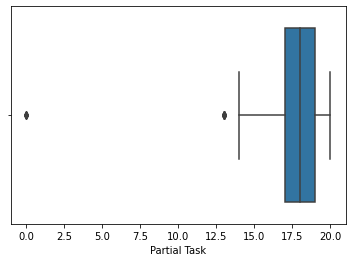

----------------------------------------
Feature Name: Midterm Exam
Mean: 12.399394856278366
Median: 13.0
Standard Deviation: 5.909745387268121
Minimum: 0.0
Maximum: 20.0
Skewness: -0.49317840413966296
Kurtosis: -0.7294444667049187


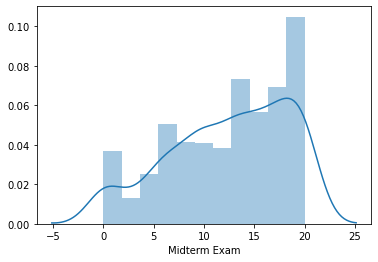

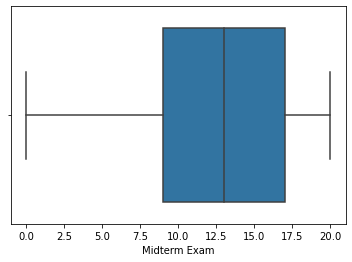

----------------------------------------
Feature Name: Qualified Practice 2
Mean: 11.786686838124055
Median: 12.0
Standard Deviation: 6.493169236482225
Minimum: 0.0
Maximum: 20.0
Skewness: -0.3115974873552572
Kurtosis: -1.0848881474221101


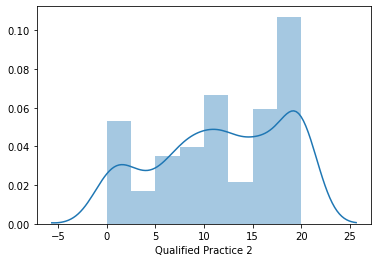

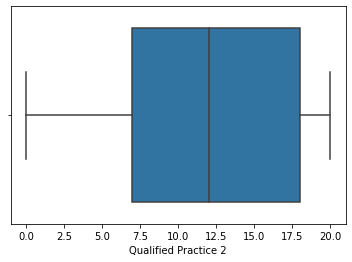

----------------------------------------


In [13]:
# Univariate analysis for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print('Feature Name:', col)
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    print('Standard Deviation:', df[col].std())
    print('Minimum:', df[col].min())
    print('Maximum:', df[col].max())
    print('Skewness:', df[col].skew())
    print('Kurtosis:', df[col].kurtosis())
    sns.distplot(df[col], kde=True)
    plt.show()
    sns.boxplot(df[col])
    plt.show()
    print('----------------------------------------')

Observations:
- Qualififed Practice 1 and 2 seems normally distributed with no presence of outliers.
- Partial Task seems negatively skewed with presence of outliers. This indicate more students tend to achieve higher scores.
- Midterm Exam seems normally distributed with no presence of outliers.
- Final Task seems negatively skewed but no presence of outliers can be observed.
- Participation in Class seems negatively skewed with presence of outliers. A high number of students can be observed with next to zero participation.
- Final Exam seems normally distributed with no presence of outliers.
- Linguistic Comprehension and Mathematics seems negatively skewed with presence of outliers.
- Output is normally distributed with no outliers.

##### Univariate Analysis of Categorical Features

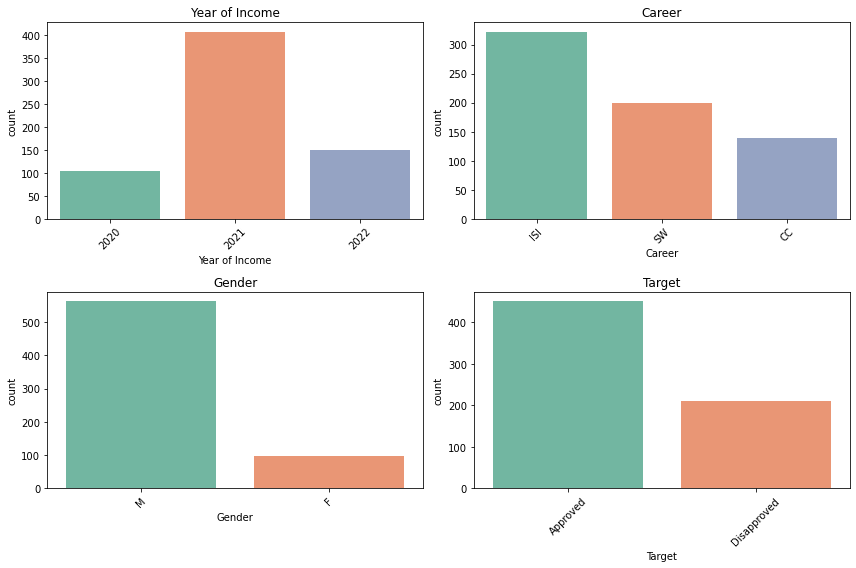

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns

plot_count = 1
plt.figure(figsize = (12,8))
for col in cat_cols:
    plt.subplot(2, 2, plot_count)
    plt.gca().set_title(col)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plot_count += 1
plt.tight_layout()
plt.show()

Observations:
- Imbalanced distribution for Year of Income and Sex.
- Target Variable, i.e., Output Feature 1 is balanced.

##### Multivariate Analysis of Categorical Features

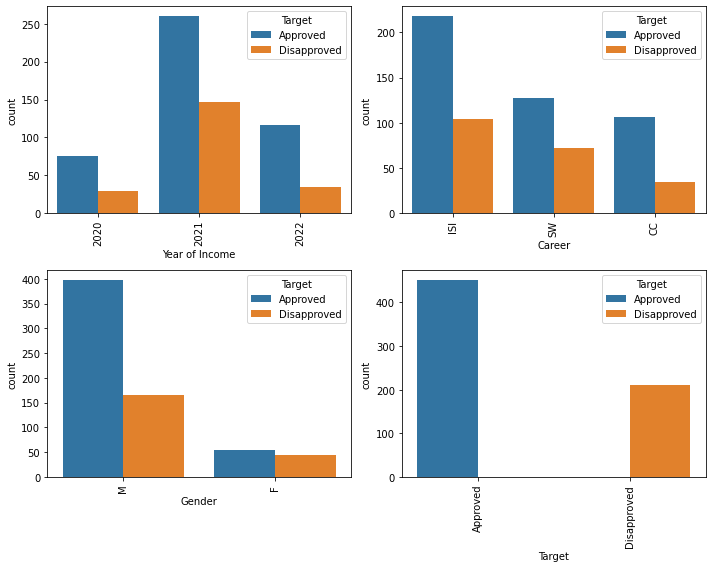

In [15]:
# check bar plots of all categorical variables with target variable
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# make plots
for variable, subplot in zip(cat_cols, ax.flatten()):
    sns.countplot(x=variable, data=df, hue='Target', ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

##### Multivariate Analysis of Numerical Features

In [16]:
# label encode target variable using map
df['Target'] = df['Target'].map({'Disapproved': 0, 'Approved': 1})

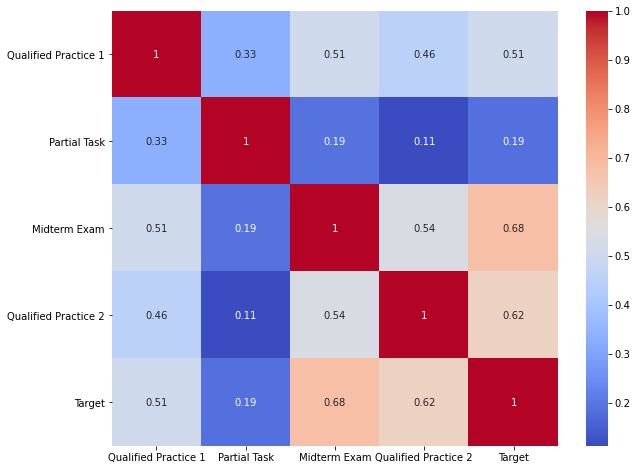

In [17]:
# correlation heatmap for numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

##### Data Augmentation (SMOTE)

In [18]:
# label encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
df

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Target
0,2,1,1,9,19.0,17.0,12.0,1
1,2,1,0,15,20.0,20.0,20.0,1
2,2,1,1,6,0.0,0.0,5.0,0
3,2,1,1,20,20.0,20.0,20.0,1
4,2,1,1,6,16.0,15.0,7.0,0
...,...,...,...,...,...,...,...,...
662,1,2,1,19,18.0,14.0,17.0,1
663,1,2,1,11,18.0,9.0,15.0,1
664,1,2,1,18,18.0,20.0,12.0,1
665,1,2,1,18,19.0,12.0,17.0,1


In [20]:
# seperate 20% of data for testing
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train.shape, X_test.shape

((528, 7), (133, 7))

In [22]:
# scale data
#scaler = MinMaxScaler(feature_range=(-1, 1))
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [23]:
# SMOTE
#smote = SMOTE(sampling_strategy={1: 1000, 0: 1000}, random_state=42)
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [24]:
# check new training data
print(X_train.shape, y_train.shape)

(528, 7) (528,)


In [25]:
# verify test data shape
print(X_test.shape, y_test.shape)

(133, 7) (133,)


##### **Models Testing (Cross Validation)**

In [26]:
# results_df to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [27]:
# function to do cv and return mean scores
def cv_scores(model_name, model):

    # define cv
    kf = KFold(n_splits=5)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X_train, y_train):
        print('Starting fold...')
        
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        
        
        #X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        #y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        recall_scores.append(recall_score(y_test_cv, y_pred))
        precision_scores.append(precision_score(y_test_cv, y_pred))
        f1_scores.append(f1_score(y_test_cv, y_pred))
        accuracy_scores.append(accuracy_score(y_test_cv, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [28]:
# models to test
models_dict = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Support Vector Machine': SVC(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(n_jobs=-1)
}

In [29]:
# evaluate models
for model_name, model in models_dict.items():
    cv_scores(model_name, model)
   

Evaluating Decision Tree model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Random Forest model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Logistic Regression model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Support Vector Machine model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating K Nearest Neighbors model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [30]:
# Function to create a Keras model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model

# Function to do cv and return mean scores
def cv_scores_keras(model_name, X, y, epochs=20, batch_size=32):

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #X_train, X_test = X[train_index], X[test_index]
        #y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_model(input_shape=(X_train.shape[1],), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [31]:
# evaluate DNN
cv_scores_keras('Keras DNN', X_train, y_train)

Evaluating Keras DNN model...
Starting fold...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,658
Trainable params: 2,658
Non-trainable params: 0
_________________________________________________________________
None
Starting fold...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                             

In [32]:
# Function to create an LSTM Keras model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model

# Function to do cv and return mean scores
def cv_scores_keras_lstm(model_name, X, y, epochs=20, batch_size=32):

    # Reshape input data for LSTM (samples, timesteps, features)
    #X = X.values.reshape(X.shape[0], X.shape[1], 1)
 

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #X_train, X_test = X[train_index], X[test_index]
        #y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]


In [33]:
# evaluate LSTM
cv_scores_keras_lstm('Keras LSTM', X_train, y_train)

Evaluating Keras LSTM model...
Starting fold...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 2)                 66        
                                                                 
Total params: 29,378
Trainable params: 29,378
Non-trainable params: 0
_________________________________________________________________
None
Starting fold...
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 64)             16896     
                        

In [34]:
# check results of CV evaluation
results_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
1,Random Forest,0.958,0.955,0.986,0.970
0,Decision Tree,0.938,0.951,0.958,0.954
3,Support Vector Machine,0.890,0.900,0.947,0.922
2,Logistic Regression,0.883,0.900,0.933,0.915
4,K Nearest Neighbors,0.871,0.884,0.939,0.909
6,Keras LSTM,0.888,0.890,0.888,0.887
5,Keras DNN,0.881,0.882,0.881,0.879


##### **Hold-Out Set Evaluation**

In [35]:
# function to evaluate on hold out set and create confusion matrix of a model
def plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test):

    # fit model
    model.fit(X_train, y_train)

    # predict classes
    y_pred = model.predict(X_test)

    # scores
    print(f'\n\nModel Name: {model_name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')

    # create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()



Model Name: Decision Tree
Accuracy: 0.9849624060150376
Precision: 0.978494623655914
Recall: 1.0
F1 Score: 0.9891304347826088


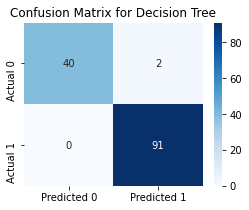



Model Name: Random Forest
Accuracy: 0.9398496240601504
Precision: 0.9560439560439561
Recall: 0.9560439560439561
F1 Score: 0.9560439560439561


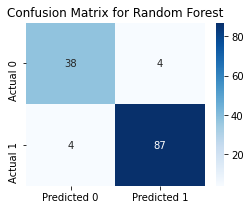



Model Name: Logistic Regression
Accuracy: 0.8646616541353384
Precision: 0.9010989010989011
Recall: 0.9010989010989011
F1 Score: 0.9010989010989011


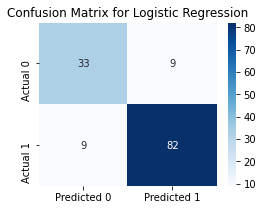



Model Name: Support Vector Machine
Accuracy: 0.8872180451127819
Precision: 0.8958333333333334
Recall: 0.945054945054945
F1 Score: 0.9197860962566845


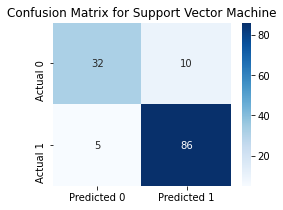



Model Name: K Nearest Neighbors
Accuracy: 0.8796992481203008
Precision: 0.9032258064516129
Recall: 0.9230769230769231
F1 Score: 0.9130434782608696


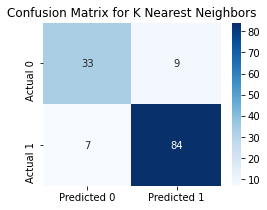

In [36]:
# plot confusion matrix for all models
for model_name, model in models_dict.items():
    plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                512       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2,658
Trainable params: 2,658
Non-trainable params: 0
_________________________________________________________________
None


Model Name: Keras DNN
Accuracy: 0.8571428571428571
Precision: 0.8913043478260869
Recall: 0.9010989010989011
F1 Score: 0.8961748633879782


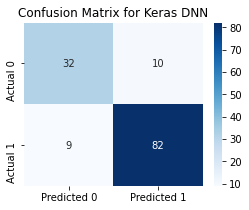

In [37]:
# DNN model
model = create_model(input_shape=(X_train.shape[1],), num_classes=2)

# train model
model.fit(X_train, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# scores
print(f'\n\nModel Name: Keras DNN')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras DNN')
plt.show()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 7, 64)             16896     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
Total params: 29,378
Trainable params: 29,378
Non-trainable params: 0
_________________________________________________________________
None


Model Name: Keras LSTM
Accuracy: 0.8571428571428571
Precision: 0.875
Recall: 0.9230769230769231
F1 Score: 0.8983957219251337


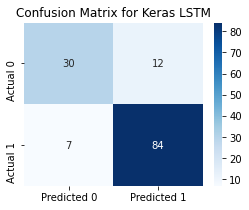

In [38]:
# LSTM model
lstm_model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=2)

# Reshape input data for LSTM
X_train_reshaped = X_train.values.reshape(X_train.values.shape[0], X_train.values.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.values.shape[0], X_test.values.shape[1], 1)

# train model
lstm_model.fit(X_train_reshaped, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(lstm_model.predict(X_test_reshaped), axis=-1)

# scores
print(f'\n\nModel Name: Keras LSTM')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras LSTM')
plt.show()
